In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

[0] minimum sample size per bin: 78
64 73
[1] minimum sample size per bin: 78
59 73
[2] minimum sample size per bin: 67
50 71
[3] minimum sample size per bin: 73
32 84
[0] minimum sample size per bin: 79
[1] minimum sample size per bin: 73
[2] minimum sample size per bin: 68
[3] minimum sample size per bin: 75
[0] minimum sample size per bin: 75
[1] minimum sample size per bin: 77
[2] minimum sample size per bin: 77
[3] minimum sample size per bin: 73


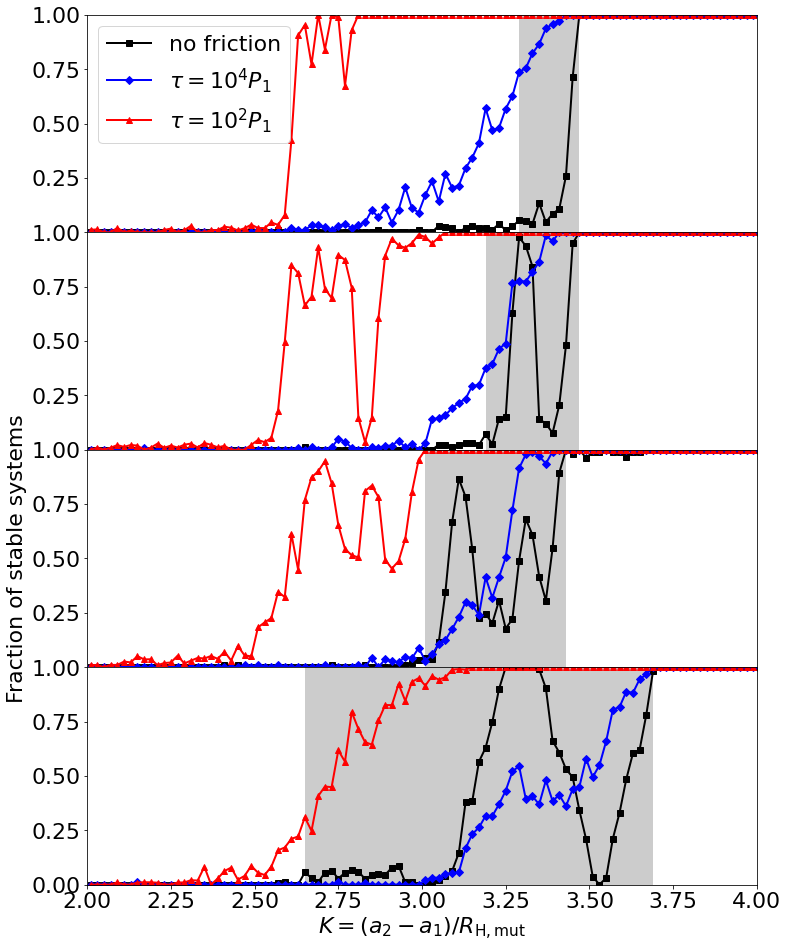

In [4]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2,label='no friction')
    #axs[iii].scatter(bins,safe_hist/tot_hist,c='k',s=10,marker='s')
    
    dpc = 0.04
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    print(igzmin,igzmax)
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='k',alpha=0.2)
    

    
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])

    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data/1p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'D-',c='b',lw=2,label=r'$\tau = 10^4P_1$')

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data/1p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'^-',c='r',lw=2,label=r'$\tau = 10^2P_1$')
    
        
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('Fraction of stable systems')

axs[-1].set_xlim([2.0,4.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-fraction_wf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-fraction_wf-wRH-rev.png',bbox_inches='tight',transparent=True)

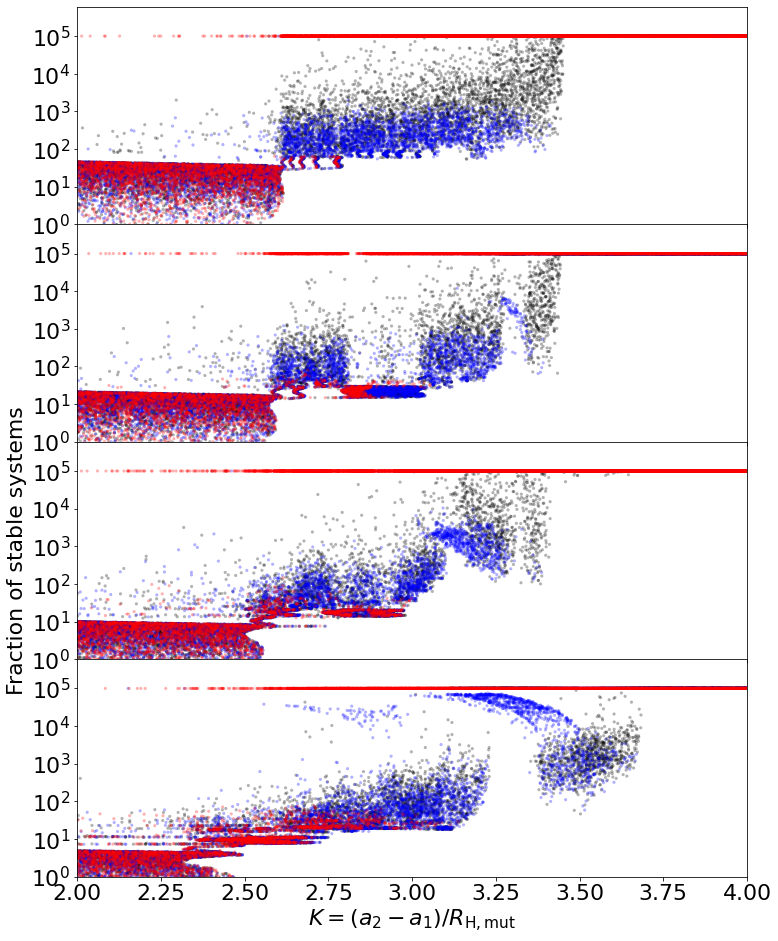

In [14]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='k',s=10,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([3.0e0,6e5])
    axs[iii].set_yticks([1e0,1e1,1e2,1e3,1e4,1e5])
    for p in np.arange(20)+1:
        for q in np.arange(3)+1:
            Kres = resonance_to_K((p+q)/(p),mu)
            #axs[iii].axvline(x=Kres,c='r',ls='--')


for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data/1p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='b',s=10,alpha=0.3,edgecolors='none',rasterized=True)
            
for iii in [0,1,2,3]:  
    mu = mu_l[iii]
    data = np.load('./data/1p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='r',s=10,alpha=0.3,edgecolors='none',rasterized=True)
            
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('Fraction of stable systems')

axs[-1].set_xlim([2.0,4.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-time_wf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_wf-wRH-rev.png',bbox_inches='tight',transparent=True)